In [1]:
pip install pandas matplotlib scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [5]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv('Iris.csv')

# Split into features (X) and target (y)
X = df.iloc[:, :-1].values  # all rows, all columns except last
y = df.iloc[:, -1].values   # all rows, last column (target class)

# Show sample
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
iris = load_iris()
X = iris.data
y = iris.target

# Feature and target names
print("Features:", iris.feature_names)
print("Target Classes:", iris.target_names)

# First 5 rows
print("\nSample data:\n", X[:5])
print("Sample labels:", y[:5])


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']

Sample data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Sample labels: [0 0 0 0 0]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: print first few scaled values
print("\nFirst 5 normalized values:\n", X_scaled[:5])



First 5 normalized values:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [9]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy = {acc:.2f}")


K=1 → Accuracy = 0.98
K=2 → Accuracy = 0.98
K=3 → Accuracy = 1.00
K=4 → Accuracy = 0.98
K=5 → Accuracy = 1.00
K=6 → Accuracy = 1.00
K=7 → Accuracy = 1.00
K=8 → Accuracy = 1.00
K=9 → Accuracy = 1.00
K=10 → Accuracy = 1.00


In [10]:
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nBest K value is: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



Best K value is: 3


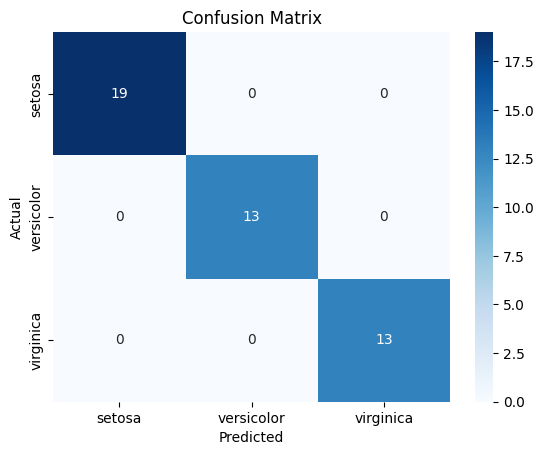

In [11]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


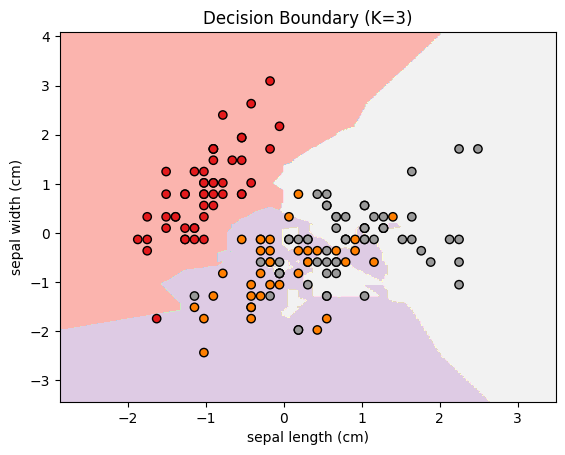

In [12]:
# Take only first 2 features for plotting
X_vis = X_scaled[:, :2]

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_v, y_train_v)

# Create mesh
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Decision Boundary (K={best_k})")
plt.show()
